# Метод зеркального отражения

Компоненты скорости тока источника:

$u_s = \frac{\sigma}{2\pi}\frac{x - x_s}{(x - x_s)^2 + (y - y_s)^2}$

$v_s = \frac{\sigma}{2\pi}\frac{y - y_s}{(x - x_s)^2 + (y - y_s)^2}$ 

Функция тока:

$\psi_s = \frac{\sigma}{2\pi}\arctan{\frac{y - y_s}{x - x_s}}$

In [4]:
import numpy
import math
from matplotlib import pyplot
# помещаем графику внутрь блокнота
%matplotlib inline

In [5]:
N = 50                                # Число точек в каждом направлении
x_start, x_end = -2.0, 2.0            # граница по x
y_start, y_end = -1.0, 1.0            # граница по y
x = numpy.linspace(x_start, x_end, N)    # вычисляем одномерный массив x
y = numpy.linspace(y_start, y_end, N)    # вычисляем одномерный массив y
X, Y = numpy.meshgrid(x, y)              # создаем расчетную сетку

In [7]:
class Source:
    """
    Contains information related to a source (or sink).
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the singularity.
        
        Parameters
        ----------
        strength: float
            Strength of the singularity.
        x: float
            x-coordinate of the singularity.
        y: float
            y-coordinate of the singularity.
        """
        self.strength = strength
        self.x, self.y = x, y
    
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by the singularity.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+\
                                                       (Y-self.y)**2)
        self.v = self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+\
                                                       (Y-self.y)**2)
    
    def stream_function(self, X, Y):
        """
        Computes the stream-function of the source on mesh X, Y.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = self.strength/(2*math.pi)*numpy.arctan2((Y-self.y), (X-self.x))

In [8]:
strength_source = 1.0                  # интенсивность источника       
x_source, y_source = 0.0, 0.5          # положение источника

# создаем источник (объект класса Source) 
source = Source(strength_source, x_source, y_source)

# вычисляем поле скорости и функцию тока для источника
# в узлах расчетной сетки
source.velocity(X, Y)
source.stream_function(X, Y)

In [9]:
# создаем отражение источника и вычисляем для него
# скорости
# и функцию тока
source_image = Source(strength_source, x_source, -y_source)
source_image.velocity(X, Y)
source_image.stream_function(X, Y)

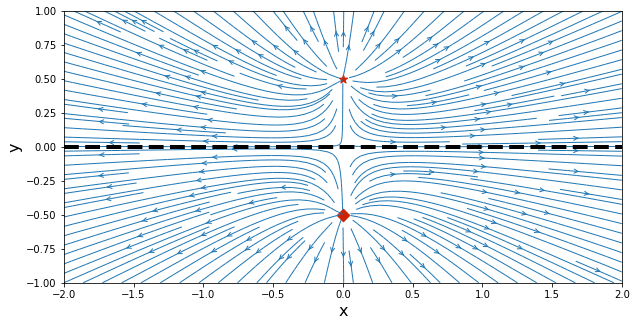

In [11]:
# суперпозиция источника и его отражения
u = source.u + source_image.u
v = source.v + source_image.v
psi = source.psi + source_image.psi

# рисуем линии тока
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.scatter(source.x, source.y, color='#CD2305', s=80, marker='*')
pyplot.scatter(source_image.x, source_image.y, color='#CD2305', s=80,\
               marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);


# Вихрь вблизи плоской поверхности

In [12]:
class Vortex:
    """
    Contains information related to a vortex.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the vortex.
        
        Parameters
        ----------
        strength: float
            Strength of the vortex.
        x: float
            x-coordinate of the vortex.
        y: float
            y-coordinate of the vortex.
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a vortex.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = +self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+\
                                                        (Y-self.y)**2)
        self.v = -self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+\
                                                        (Y-self.y)**2)
        
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by a vortex.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = -self.strength/(4*math.pi)*numpy.log((X-self.x)**2+\
                                                        (Y-self.y)**2)

In [13]:
strength_vortex = 1.0                  # интенсивность вихря
x_vortex, y_vortex = 0.0, 0.5          # положение вихря

# создаем вихрь и вычисляем для него скорости и функцию тока
vortex = Vortex(strength_vortex, x_vortex, y_vortex)
vortex.velocity(X, Y)
vortex.stream_function(X, Y)

# создаем отражение вихря и вычисляем для него скорости и функцию тока
vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
vortex_image.velocity(X, Y)
vortex_image.stream_function(X, Y)

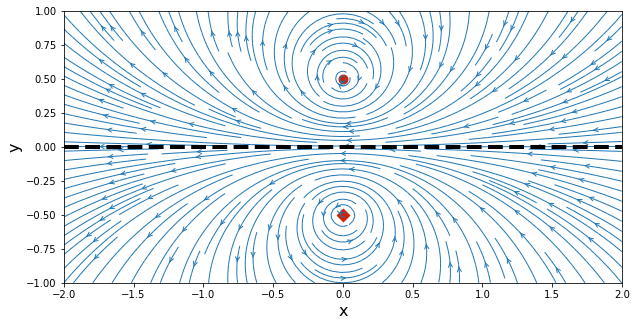

In [14]:
# суперпозиция вихря и его отражения
u = vortex.u + vortex_image.u
v = vortex.v + vortex_image.v
psi = vortex.psi + vortex_image.psi

# рисуем линии тока
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.scatter(vortex.x, vortex.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex_image.x, vortex_image.y, color='#CD2305', s=80,\
               marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

In [26]:
vortex_1_x, vortex_1_y = -1, 0.5
vortex_2_x, vortex_2_y = 1, 0.5

vortex_1 = Vortex(strength_vortex, vortex_1_x, vortex_1_y)
vortex_1.velocity(X, Y)
vortex_1.stream_function(X, Y)

vortex_2 = Vortex(-strength_vortex, vortex_2_x, vortex_2_y)
vortex_2.velocity(X, Y)
vortex_2.stream_function(X, Y)

In [27]:
vortex_image_1_x, vortex_image_1_y = -1, -0.5
vortex_image_2_x, vortex_image_2_y = 1, -0.5

vortex_image_1 = Vortex(-strength_vortex, vortex_image_1_x, vortex_image_1_y)
vortex_image_1.velocity(X, Y)
vortex_image_1.stream_function(X, Y)

vortex_image_2 = Vortex(strength_vortex, vortex_image_2_x, vortex_image_2_y)
vortex_image_2.velocity(X, Y)
vortex_image_2.stream_function(X, Y)

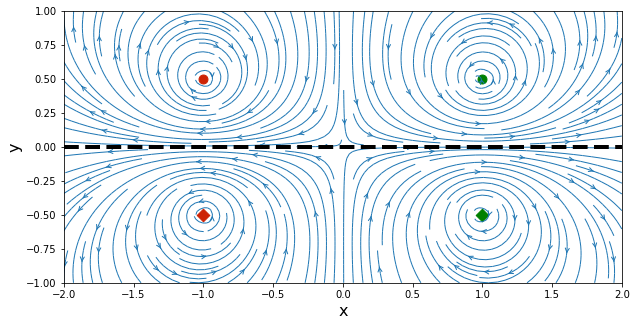

In [28]:
u = vortex_1.u + vortex_2.u + vortex_image_1.u + vortex_image_2.u
v = vortex_1.v + vortex_2.v + vortex_image_1.v + vortex_image_2.v
psi = vortex_1.psi + vortex_2.psi + vortex_image_1.psi + vortex_image_2.psi

# рисуем линии тока
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, \
                  arrowstyle='->')
pyplot.scatter(vortex_1.x, vortex_1.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex_2.x, vortex_2.y, color='g', s=80, marker='o')
pyplot.scatter(vortex_image_1.x, vortex_image_1.y, color='#CD2305', \
               s=80, marker='D')
pyplot.scatter(vortex_image_2.x, vortex_image_2.y, color='g', \
               s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

# Диполь

In [29]:
u_inf = 1.0    # скорость равномерного течения

# вычисляем компоненты скорости и функцию тока для равномерного потока
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [31]:
class Doublet:
    """
    Contains information related to a doublet.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the doublet.
        
        Parameters
        ----------
        strength: float
            Strength of the doublet.
        x: float
            x-coordinate of the doublet.
        y: float
            y-coordinate of the doublet.
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a doublet.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = -self.strength/(2*math.pi)*\
                ((X-self.x)**2-(Y-self.y)**2)/((X-self.x)**2+\
                                               (Y-self.y)**2)**2
        self.v = -self.strength/(2*math.pi)*\
                2*(X-self.x)*(Y-self.y)/((X-self.x)**2+\
                                         (Y-self.y)**2)**2
            
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by a doublet.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = -self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+ (Y-self.y)**2)

In [37]:
doublet_strength = 1.0                
doublet_x, doublet_y = 0.0, 0.3